In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
code_path = "/content/gdrive/MyDrive/CSE512-hw3/"
os.chdir(code_path)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
import scipy.io as sio

In [4]:

##In case you were wondering how I prepared the data
"""
#load data

#data source: https://finance.yahoo.com/quote/%5EGSPC/history/

weeks_after_start = []
dewtemp = []

f = open('localweather.csv')
header = f.readline()
idx = header.split(',').index('HourlyDewPointTemperatureC')
startdate = None
line = f.readline()

while len(line) > 0:
    splitline = line.split(',')
    
    #load day
    dt = splitline[5].split(' ')
    d = dt[0].split('-')
    t = dt[1].split(':')
    
    d = int(d[0]),int(d[1]),int(d[2])    
    t = int(t[0]), int(t[1])
    d = datetime.datetime(year=d[0],month=d[1],day=d[2], hour=t[0],minute=d[1])
    if startdate is None:
        startdate = copy.deepcopy(d)
    
    if  len(splitline[idx].strip('')) == 0: 
        line = f.readline()
        continue
    weeks_after_start.append((d - startdate).seconds/( 24 * 60 * 60*7 +0.) + (d-startdate).days/7.)
    
    dewtemp.append(float(splitline[idx]))

    line = f.readline()

weeks_after_start, dewtemp = np.array(weeks_after_start), np.array(dewtemp)
plt.plot(weeks_after_start, dewtemp)

plt.xlabel('Weeks after first reading')
plt.ylabel('Dew point temp (C)')
plt.tight_layout()
plt.savefig('polyfit_hw1_0.png')
plt.savefig('polyfit_hw1_0.eps')
N = len(weeks_after_start)

sio.savemat('weatherDewTmp.mat',{'weeks':weeks_after_start,'dew':dewtemp})
print N
"""



"\n#load data\n\n#data source: https://finance.yahoo.com/quote/%5EGSPC/history/\n\nweeks_after_start = []\ndewtemp = []\n\nf = open('localweather.csv')\nheader = f.readline()\nidx = header.split(',').index('HourlyDewPointTemperatureC')\nstartdate = None\nline = f.readline()\n\nwhile len(line) > 0:\n    splitline = line.split(',')\n    \n    #load day\n    dt = splitline[5].split(' ')\n    d = dt[0].split('-')\n    t = dt[1].split(':')\n    \n    d = int(d[0]),int(d[1]),int(d[2])    \n    t = int(t[0]), int(t[1])\n    d = datetime.datetime(year=d[0],month=d[1],day=d[2], hour=t[0],minute=d[1])\n    if startdate is None:\n        startdate = copy.deepcopy(d)\n    \n    if  len(splitline[idx].strip('')) == 0: \n        line = f.readline()\n        continue\n    weeks_after_start.append((d - startdate).seconds/( 24 * 60 * 60*7 +0.) + (d-startdate).days/7.)\n    \n    dewtemp.append(float(splitline[idx]))\n\n    line = f.readline()\n\nweeks_after_start, dewtemp = np.array(weeks_after_start),

742


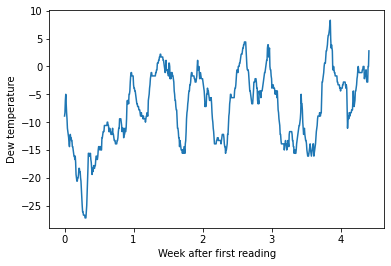

In [5]:
#This cell forms the mat file you were already given
data = sio.loadmat('weatherDewTmp.mat')
weeks_after_start = data['weeks'][0]
dewtemp = data['dew'][0]
N = len(dewtemp)
plt.plot(weeks_after_start, dewtemp)
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
print(N)

In [13]:
#Question (a)
def packX(z,poly_order):
    X = np.zeros((len(z),poly_order+1))

    for i in range(poly_order+1):
      X[:, i] = np.array(z)**i

    return X


def solveLinearSystem(X,y):
    theta = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y)) #normal equations
    return theta

# TEST SCRIPT. DO NOT MODIFY!
X = packX(range(100),3)
y = np.sqrt(np.array(range(100)))
theta = solveLinearSystem(X,y)
print('Check number is', np.sum(theta))


Check number is 1.341270179610586


In [8]:
pLst = [1, 2, 3, 10, 100]

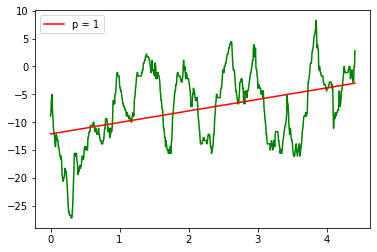

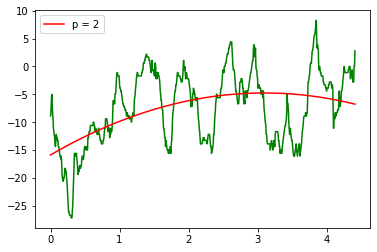

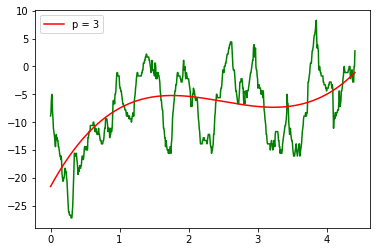

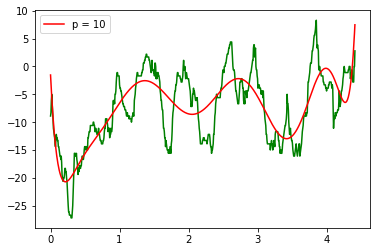

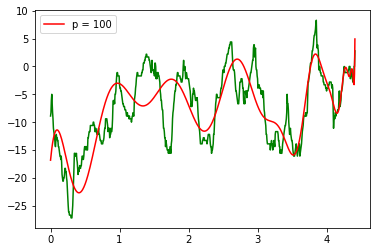

In [12]:

for p in pLst:
  X = packX(weeks_after_start, p)
  theta = solveLinearSystem(X, dewtemp)
  y_pre = np.dot(X, theta)

  plt.plot(weeks_after_start, dewtemp, c = 'green')
  plt.plot(weeks_after_start, y_pre, label = ('p = ' + str(p)), c = 'red')

  plt.legend()
  plt.show()


In [15]:
def solveRidgeRegressionSystem(X,y,rho):
    theta = np.linalg.solve(np.matmul(X.T, X) + rho * np.identity(X.shape[1]), np.matmul(X.T, y))
    return theta

# TEST SCRIPT. DO NOT MODIFY!
X = packX(range(100),3)
y = np.sqrt(np.array(range(100)))
theta = solveRidgeRegressionSystem(X,y,1)
print('Check number is', np.sum(theta))


Check number is 1.2061712965226425


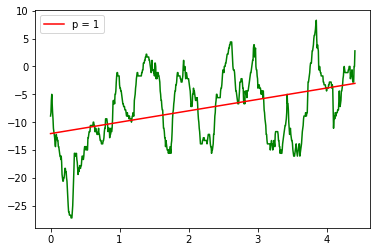

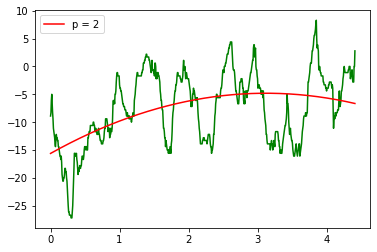

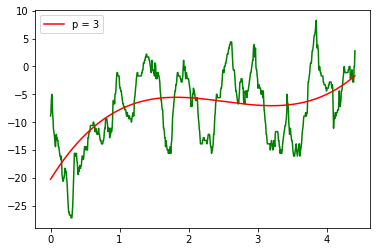

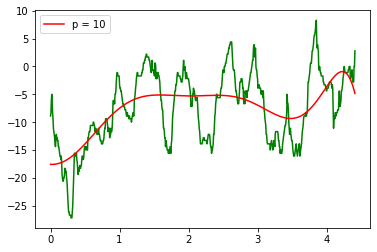

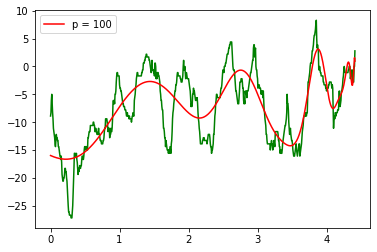

In [16]:

for p in pLst:
  X = packX(weeks_after_start, p)
  theta = solveRidgeRegressionSystem(X, dewtemp, 1)
  y_pre = np.dot(X, theta)

 
  plt.plot(weeks_after_start, dewtemp, c = 'green')
  plt.plot(weeks_after_start, y_pre, label = ('p = ' + str(p)), c = 'red')
  plt.legend()
  plt.show()


In [79]:
pLst1 = [1, 2, 5, 10]

In [81]:
for p in pLst1:
  for rho in [0, N, N*10, N*100]:
    X = packX(weeks_after_start, p)
    Q = np.dot(X.T, X) + rho*np.identity(X.shape[1])
    KQ = np.linalg.cond(Q)
    print('P'+ ' || ' + str(p) + ' || ' + 'rho'+ ' || ' + str(rho) + ' || ' + 'K(Q)'+ ' || ' + str(KQ))

P || 1 || rho || 0 || K(Q) || 32.472521666398684
P || 1 || rho || 742 || K(Q) || 6.754235401156341
P || 1 || rho || 7420 || K(Q) || 1.6887590213669572
P || 1 || rho || 74200 || K(Q) || 1.0702597386922308
P || 2 || rho || 0 || K(Q) || 1476.3924507440943
P || 2 || rho || 742 || K(Q) || 79.11371158831943
P || 2 || rho || 7420 || K(Q) || 9.202205647238008
P || 2 || rho || 74200 || K(Q) || 1.8243450966088195
P || 5 || rho || 0 || K(Q) || 730851302.3775175
P || 5 || rho || 742 || K(Q) || 271693.24960615137
P || 5 || rho || 7420 || K(Q) || 27179.318088769916
P || 5 || rho || 74200 || K(Q) || 2718.922773636268
P || 10 || rho || 0 || K(Q) || 7.157429647449161e+18
P || 10 || rho || 742 || K(Q) || 397031762841.3795
P || 10 || rho || 7420 || K(Q) || 39703178289.463005
P || 10 || rho || 74200 || K(Q) || 3970317849.5276527


In [82]:
for p in pLst1:
  for rho in [0, N, N*10, N*100]:
    X = packX(weeks_after_start, p)
    theta = solveRidgeRegressionSystem(X, dewtemp, rho)
    y_pre = np.dot(X, theta)

    mean_squared_error = np.sum((y_pre - dewtemp) ** 2)/N
    
    print('P'+ ' || ' + str(p) + ' || ' + 'rho'+ ' || ' + str(rho) + ' || ' + 'mean squard error'+ ' || ' + str(mean_squared_error))

P || 1 || rho || 0 || mean squard error || 36.38217361905994
P || 1 || rho || 742 || mean squard error || 58.80283013948351
P || 1 || rho || 7420 || mean squard error || 78.34463001407917
P || 1 || rho || 74200 || mean squard error || 96.31928655068175
P || 2 || rho || 0 || mean squard error || 33.53185241449123
P || 2 || rho || 742 || mean squard error || 57.61883781375108
P || 2 || rho || 7420 || mean squard error || 77.25615112057318
P || 2 || rho || 74200 || mean squard error || 86.84731522758038
P || 5 || rho || 0 || mean squard error || 27.0671045152648
P || 5 || rho || 742 || mean squard error || 57.23483324805714
P || 5 || rho || 7420 || mean squard error || 71.9915827133517
P || 5 || rho || 74200 || mean squard error || 77.48731086603902
P || 10 || rho || 0 || mean squard error || 16.707135186130255
P || 10 || rho || 742 || mean squard error || 55.38371919899731
P || 10 || rho || 7420 || mean squard error || 71.3923471023423
P || 10 || rho || 74200 || mean squard error || 76.7

We can find that when P = 10 and rho = 0, we can get the min mean squard error = 16.707135186130255, pick(10, 0)

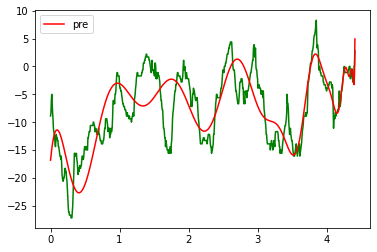

In [17]:
pM = 10
rhoM = 0
X = packX(weeks_after_start, p)
theta = solveRidgeRegressionSystem(X, dewtemp, rhoM)
y_pre = np.dot(X, theta)


plt.plot(weeks_after_start, dewtemp, c = 'green')
plt.plot(weeks_after_start, y_pre, label = 'pre', c = 'red')

plt.legend()
plt.show()